# Artificial Neural Network

### Importing the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

import tensorflow as tf

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
tf.__version__

'2.3.0'

## Data Preprocessing

### Importing the dataset

In [3]:
df = pd.read_excel('Folds5x2_pp.xlsx')
df.head()

,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90


## Exploratory Data analysis

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9568 entries, 0 to 9567
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      9568 non-null   float64
 1   V       9568 non-null   float64
 2   AP      9568 non-null   float64
 3   RH      9568 non-null   float64
 4   PE      9568 non-null   float64
dtypes: float64(5)
memory usage: 373.9 KB


In [17]:
df.isna().sum()

AT    0
V     0
AP    0
RH    0
PE    0
dtype: int64

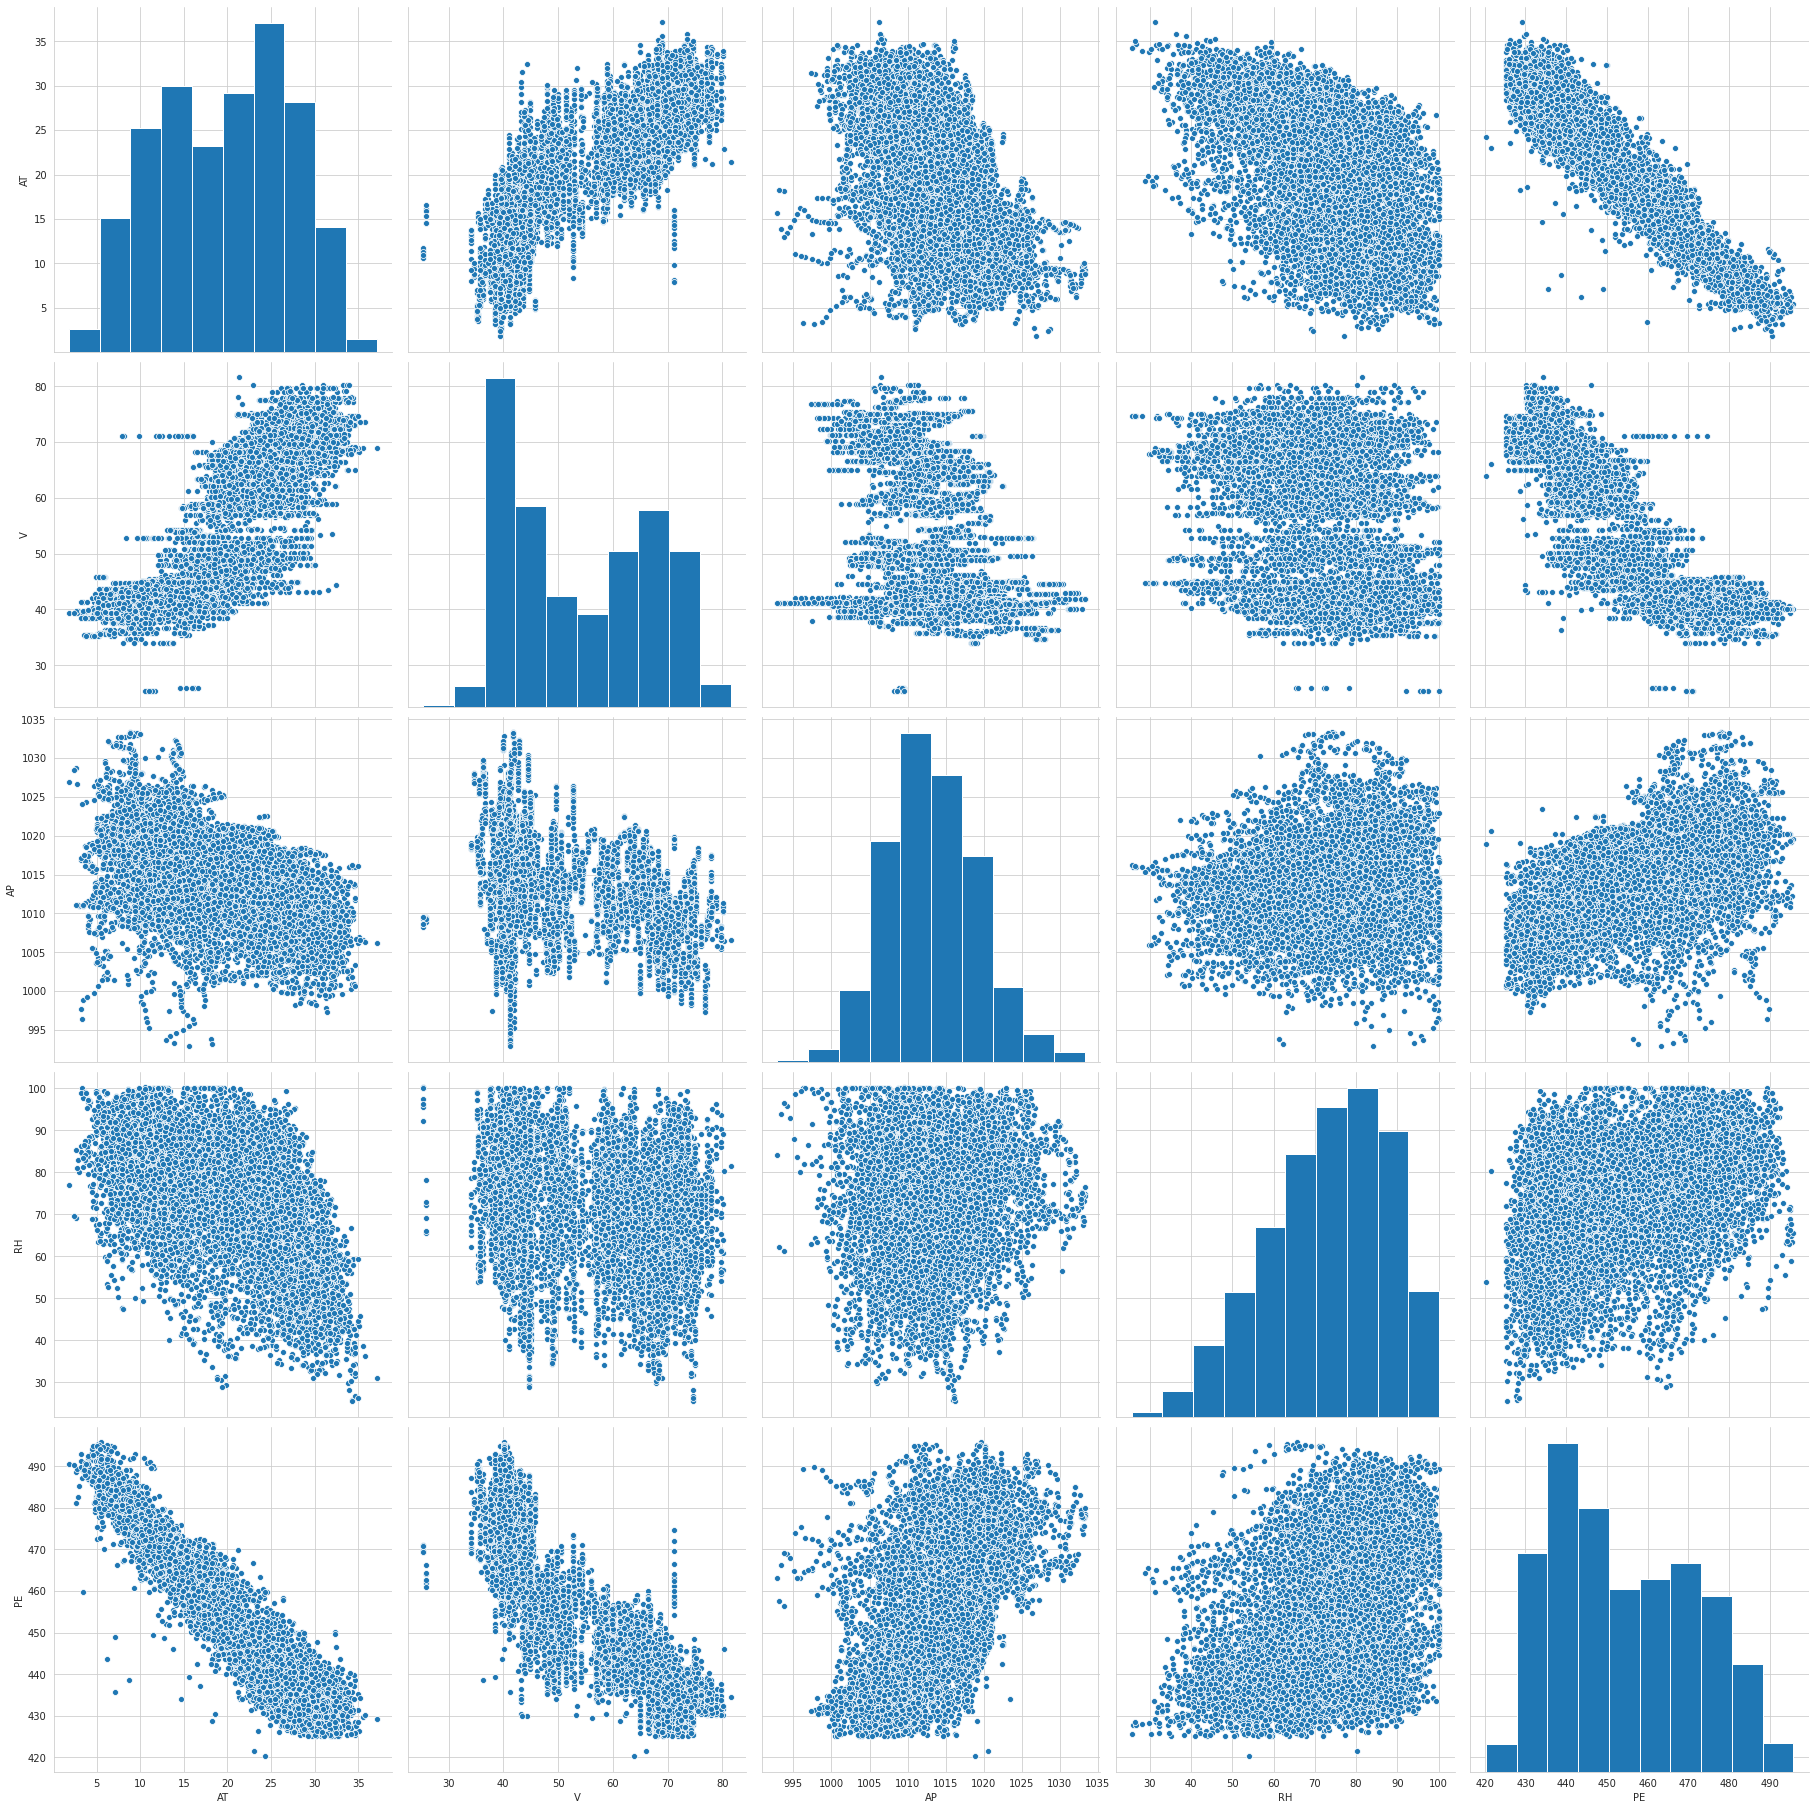

In [18]:
sns.set_style(style='whitegrid')
sns.pairplot(df,height=5)

In [19]:
df.describe()

,AT,V,AP,RH,PE
count,9568.000000,9568.000000,9568.000000,9568.000000,9568.000000
mean,19.651231,54.305804,1013.259078,73.308978,454.365009
std,7.452473,12.707893,5.938784,14.600269,17.066995
min,1.810000,25.360000,992.890000,25.560000,420.260000
25%,13.510000,41.740000,1009.100000,63.327500,439.750000
50%,20.345000,52.080000,1012.940000,74.975000,451.550000
75%,25.720000,66.540000,1017.260000,84.830000,468.430000
max,37.110000,81.560000,1033.300000,100.160000,495.760000


In [20]:
df.corr()

,AT,V,AP,RH,PE
AT,1.000000,0.844107,-0.507549,-0.542535,-0.948128
V,0.844107,1.000000,-0.413502,-0.312187,-0.869780
AP,-0.507549,-0.413502,1.000000,0.099574,0.518429
RH,-0.542535,-0.312187,0.099574,1.000000,0.389794
PE,-0.948128,-0.869780,0.518429,0.389794,1.000000


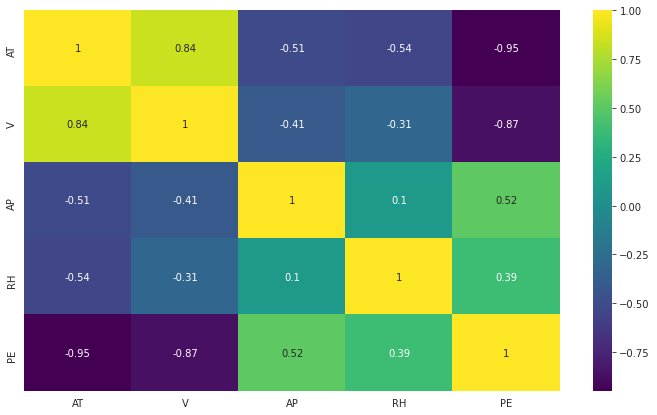

In [21]:

plt.figure(figsize=(12,7))
sns.heatmap(df.corr(),annot=True,cmap='viridis')

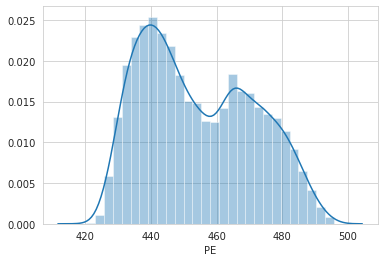

In [24]:
sns.distplot(df['PE'])

In [25]:
df['PE'].value_counts()

468.80    9
447.06    8
434.01    8
442.78    8
468.87    7
         ..
488.01    1
448.08    1
477.24    1
425.98    1
477.04    1
Name: PE, Length: 4836, dtype: int64

In [26]:
df.corr()['PE'].sort_values()

AT   -0.948128
V    -0.869780
RH    0.389794
AP    0.518429
PE    1.000000
Name: PE, dtype: float64

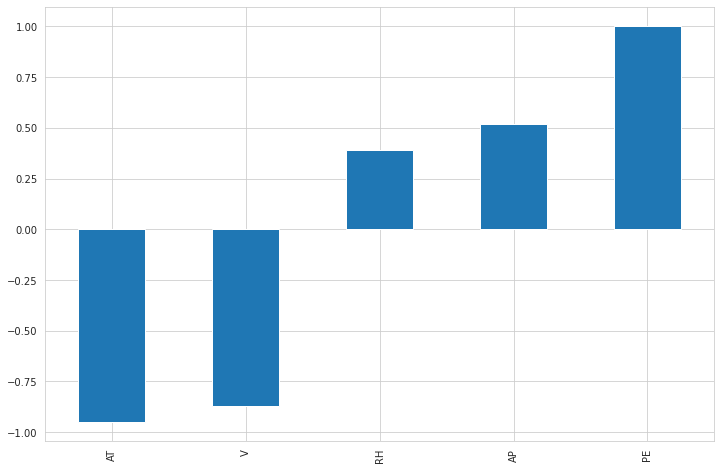

In [27]:
plt.figure(figsize=(12,8))
df.corr()['PE'].sort_values().plot(kind='bar')

In [28]:
x = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

### Splitting the dataset into the Training set and Test set

In [29]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2,random_state=0)

In [30]:
#Initialization 
ann = tf.keras.models.Sequential()
#First hidden layer
ann.add(tf.keras.layers.Dense(units=6,activation='relu'))
#Second hidden layer
ann.add(tf.keras.layers.Dense(units=6,activation='relu'))
#output layer
ann.add(tf.keras.layers.Dense(units=1))

ann.compile(optimizer='adam',loss='mean_squared_error')


### Fitting the ANN to the Training set

In [31]:
ann.fit(xtrain,ytrain,batch_size=32, epochs=100)

Epoch 1/100
240/240 [==============================] - 0s 793us/step - loss: 281121.5625
Epoch 2/100
240/240 [==============================] - 0s 898us/step - loss: 206389.7969
Epoch 3/100
240/240 [==============================] - 0s 835us/step - loss: 206187.3281
Epoch 4/100
240/240 [==============================] - 0s 810us/step - loss: 205978.7344
Epoch 5/100
240/240 [==============================] - 0s 882us/step - loss: 205767.1875
Epoch 6/100
240/240 [==============================] - 0s 807us/step - loss: 205554.2031
Epoch 7/100
240/240 [==============================] - 0s 821us/step - loss: 205340.0156
Epoch 8/100
240/240 [==============================] - 0s 802us/step - loss: 205125.3906
Epoch 9/100
240/240 [==============================] - 0s 823us/step - loss: 204910.0781
Epoch 10/100
240/240 [==============================] - 0s 816us/step - loss: 204694.7500
Epoch 11/100
240/240 [==============================] - 0s 821us/step - loss: 204479.1406
Epoch 12/100
240/24

In [32]:
ypred = ann.predict(xtest)
np.set_printoptions(precision=2)
print(np.concatenate((ypred.reshape(len(ypred),1), ytest.reshape(len(ytest),1)),1))

[[ 23.86 431.23]
 [ 23.86 460.01]
 [ 23.86 461.14]
 ...
 [ 23.86 473.26]
 [ 23.86 438.  ]
 [ 23.86 463.28]]


## Evaluating ANN model

In [33]:
from sklearn.metrics import *
print(f'R2: {r2_score(ytest,ypred)}\nMSE:-{mean_squared_error(ytest,ypred)}\nRMSE:-{np.sqrt(mean_squared_error(ytest,ypred))}\n')

R2: -634.3761781941888
MSE:-185839.80308977945
RMSE:-431.09140920433504

